In [1]:
import pandas as pd

In [3]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [6]:
ufo.Time.str.slice(-5, -3).astype(int).head() #Pegando a hora de maneira menos eficiente
#Obs.: Esse astype pode ser usado p/ converter o tipo de uma coluna

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [14]:
ufo["Time"] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [16]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [25]:
dic = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
ufo["dia_da_semana"] = ufo.Time.dt.weekday.apply(lambda x: dic[x])
ufo.head()
#Outros atributos: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

,City,Colors Reported,Shape Reported,State,Time,dia_da_semana
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday


In [48]:
ts = pd.to_datetime("3/27/1999") #mês, dia, ano
ts

Timestamp('1999-03-27 00:00:00')

In [49]:
ufo.loc[ufo.Time >= ts].head()

,City,Colors Reported,Shape Reported,State,Time,dia_da_semana
13241,Wheeling,GREEN,FIREBALL,WV,1999-03-27 02:30:00,Saturday
13242,Follansbee,NaN,DISK,WV,1999-03-27 17:30:00,Saturday
13243,Marstons Mills,NaN,EGG,MA,1999-03-27 22:00:00,Saturday
13244,Kent,RED,SPHERE,WA,1999-03-28 18:00:00,Sunday
13245,Enola,GREEN,NaN,PA,1999-03-28 19:30:00,Sunday


In [52]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [66]:
ufo["year_month"] = ufo.Time.dt.year.astype(str) + "-" + ufo.Time.dt.month.astype(str)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,dia_da_semana,year_month
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday,1930-6
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday,1930-6
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday,1931-2
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday,1931-6
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday,1933-4


In [82]:
x = ufo["year_month"].value_counts().sort_index() #sort_index() ordena pelo índice
x

1930-6      2
1931-2      1
1931-6      1
1933-4      1
1934-9      1
         ... 
2000-5    154
2000-6    233
2000-7    322
2000-8    250
2000-9    257
Name: year_month, Length: 640, dtype: int64

<AxesSubplot:>

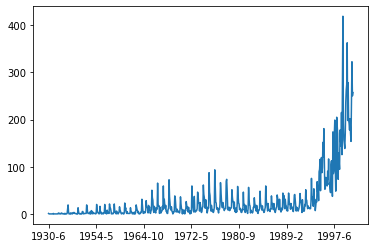

In [81]:
x.plot()

In [ ]:
pd.to_datetime(df.InvoiceDate).dt.strftime('%Y-%m') #Jeito de pegar oq vc quer como string
pd.to_datetime(df.InvoiceDate, format='%m/%d/%y %H:%M') #Jeito de passar no formato que vc quer